In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import glob
import sys

from skimage import feature
from skimage.transform import hough_line, hough_line_peaks  # , probabilistic_hough_line

from scipy import ndimage as ndi
from copy import deepcopy

sys.path.append("../lab1/")
import visualPercepUtils as vpu
plt.gray()
figure_size = (7, 7)

<Figure size 640x480 with 0 Axes>

# Exercise 1

We can see that there is no difference between applying the sobel detector using both methods. In the upper row we have the horizonatl and vertical ones using scipy `sobel()` function and the lower row the convolutions applying the sobel filter.

4 None None


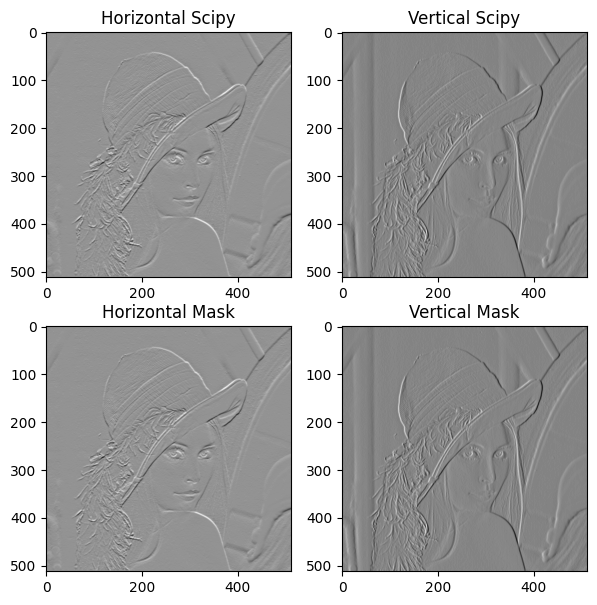

In [2]:
im = np.array(Image.open("imgs-P4/lena.pgm").convert('L')).astype('int32')
im2 = ndimage.sobel(im, 0)
im3 = ndimage.sobel(im, 1)
maskv = np.vstack(np.array([1, 2, 1])) * np.array([1,0,-1])
im4 = ndimage.convolve(im, maskv)
maskh = np.vstack(np.array([1,0,-1])) * np.array([1, 2, 1])
im5 = ndimage.convolve(im, maskh)
vpu.showInGrid([im2, im3, im5, im4], figure_size, subtitles=["Horizontal Scipy","Vertical Scipy","Horizontal Mask","Vertical Mask"])

# Exercise 2

In [3]:
def addGaussianNoise(im, sd=5):
    return im + np.random.normal(loc=0, scale=sd, size=im.shape)

1 None None


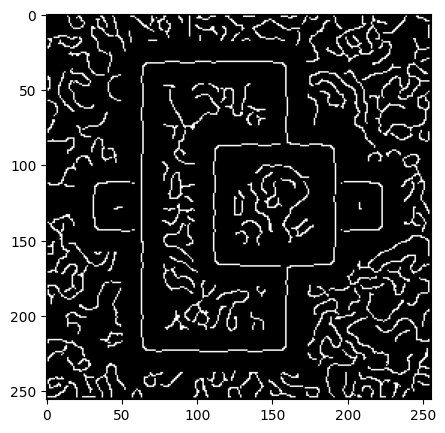

In [4]:
im = np.array(Image.open("imgs-P4/cuadros.png").convert('L'))
im2 = addGaussianNoise(im, 0.06)
im3 = feature.canny(im2, sigma = 3, low_threshold=0.01, high_threshold=0.02, use_quantiles=False)
vpu.showInGrid([im3], figure_size=(5, 5))

# Exercise 3

Thre is a difference between the number of peaks when changing the rotation. My opinion is that it might be related to the canny detector before applying the HT, different angles might create differences in the edges, making it more difficult to find certain lines.
As you can see there is also a difference in the angle of the peaks of the HT, but that is trivial if you change the angles of the image all edges and contours will change angles also changing in the same amount the angle of the HT peaks.

# angles: 200
# distances: 727
rho[...] [-363. -362. -361. -360. -359.] [359. 360. 361. 362. 363.]
peak 160 at angle -0.4522613065326558 and distance  62.0
peak 86 at angle 90.0 and distance  224.0
peak 86 at angle 90.0 and distance  31.0
peak 82 at angle 0.4522613065326685 and distance  113.0
peak 80 at angle 0.4522613065326685 and distance  161.0
peak 72 at angle 89.09547738693469 and distance  89.0
peak 72 at angle -89.09547738693468 and distance  -164.0
peak 60 at angle 0.4522613065326685 and distance  192.0
peak 51 at angle 90.0 and distance  144.0
peak 51 at angle 90.0 and distance  111.0
peak 27 at angle -2.261306532663317 and distance  26.0


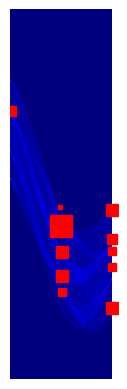

In [5]:
im = np.array(Image.open("imgs-P4/cuadros.png").convert('L'))
im = ndi.rotate(im, 0, mode='nearest')

edge = feature.canny(im, sigma=1, low_threshold=0.2 * 255, high_threshold=0.25 * 255, use_quantiles=False)
numThetas = 200
H, thetas, rhos = hough_line(edge, np.linspace(-np.pi/2, np.pi/2, numThetas))
print("# angles:", len(thetas))
print("# distances:", len(rhos))
print("rho[...]", rhos[:5],rhos[-5:])

nPeaksMax = np.inf

peaks_values, peaks_thetas, peaks_rhos = hough_line_peaks(H, thetas, rhos, num_peaks=nPeaksMax, threshold=0.15 * np.max(H), min_angle=20, min_distance=15)
vpu.displayHoughPeaks(H, peaks_values, peaks_thetas, peaks_rhos, thetas, rhos)

# angles: 200
# distances: 1025
rho[...] [-512. -511. -510. -509. -508.] [508. 509. 510. 511. 512.]
peak 188 at angle -44.77386934673367 and distance  -63.0
peak 120 at angle 44.77386934673366 and distance  351.0
peak 108 at angle -44.77386934673367 and distance  65.0
peak 107 at angle -44.77386934673367 and distance  33.0
peak 95 at angle -44.77386934673367 and distance  -15.0
peak 81 at angle 45.678391959798994 and distance  160.0
peak 74 at angle 45.678391959798994 and distance  214.0
peak 71 at angle 45.678391959798994 and distance  294.0
peak 68 at angle 44.77386934673366 and distance  239.0
peak 58 at angle 44.77386934673366 and distance  271.0
peak 33 at angle -43.869346733668344 and distance  101.0
peak 32 at angle -45.678391959798994 and distance  -99.0


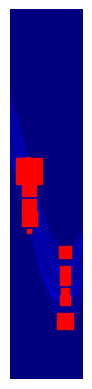

In [6]:
im = np.array(Image.open("imgs-P4/cuadros.png").convert('L'))
im = ndi.rotate(im, 45, mode='nearest')

edge = feature.canny(im, sigma=1, low_threshold=0.2 * 255, high_threshold=0.25 * 255, use_quantiles=False)
numThetas = 200
H, thetas, rhos = hough_line(edge, np.linspace(-np.pi/2, np.pi/2, numThetas))
print("# angles:", len(thetas))
print("# distances:", len(rhos))
print("rho[...]", rhos[:5],rhos[-5:])

nPeaksMax = np.inf

peaks_values, peaks_thetas, peaks_rhos = hough_line_peaks(H, thetas, rhos, num_peaks=nPeaksMax, threshold=0.15 * np.max(H), min_angle=20, min_distance=15)
vpu.displayHoughPeaks(H, peaks_values, peaks_thetas, peaks_rhos, thetas, rhos)

# Exercise 4

This might be an interesting way of proving the existence of edges and contour lines around the image. In the image below we can see that all the values are around 0, $\pi/4$ and $\pi/2$, this values coincide with the angles of the vertical and horizontal lines in the `lena.pgm` file, the other gradients are distributed thought different angles.

In [113]:
def HOG(im, nbins):
    im2 = ndimage.convolve(im, np.array([-1,0,1]).reshape(1,-1))
    im3 = ndimage.convolve(im, np.array([-1,0,1]).reshape(-1,1))
    im4 = np.arctan2(im3, im2)
    return np.histogram(im4, nbins)

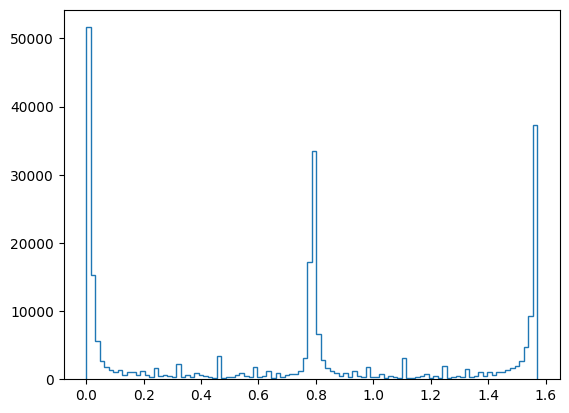

In [115]:
im = np.array(Image.open('imgs-P4/lena.pgm'))
counts, bins = HOG(im, 100)
plt.stairs(counts, bins)
plt.show()

We can show the same for the `cuadros.png` file. This time all the angles will be around 0. Because of how arctan2 is defined for zero divisions and our image only containing only horizontal and staright lines.

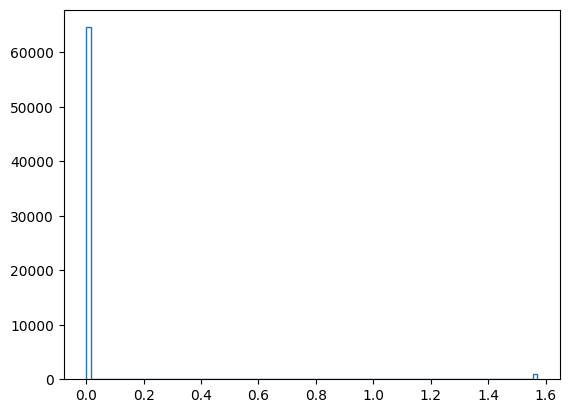

In [116]:
im = np.array(Image.open('imgs-P4/cuadros.png'))
counts, bins = HOG(im, 100)
plt.stairs(counts, bins)
plt.show()